In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
import random
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline

C:\Users\Lidia\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def balance_data(train_0, train_1, times):
    New_train = train_0.append(train_1, ignore_index =True)
    for i in range (times-1):
        New_train = New_train.append(train_1, ignore_index =True)
    New_train = New_train.sample(frac=1).reset_index(drop=True)
    return New_train

In [3]:
def check_gini(classifier, xv, yv):
    yp = classifier.predict_proba(xv)
    fp, tp, _ = roc_curve(yv.ravel(),np.zeros_like(yv))
    fp1, tp1, _ = roc_curve(yv.ravel(), yp[:, 1])
    plt.plot(fp, tp)
    plt.plot(fp1, tp1, "r-")
    plt.show()
    print(2*roc_auc_score(yv, yp[:, 1])-1)

In [11]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [ ]:
train[train.dtypes[(train.dtypes=="float64")|(train.dtypes=="int64")]
                        .index.values].hist(figsize=[21,21])

In [ ]:
train['ps_car_13'].hist(figsize=[2,2])

In [ ]:
train['ps_car_13'].describe()

In [12]:
train = train.drop('id',axis=1)
train = train[['target','ps_ind_01',
'ps_ind_03',
'ps_ind_05_cat',
'ps_ind_07_bin',
'ps_ind_15',
'ps_ind_16_bin',
'ps_reg_01',
'ps_reg_02',
'ps_reg_03',
'ps_car_01_cat',
'ps_car_03_cat',
'ps_car_07_cat',
'ps_car_12',
'ps_car_13',
'ps_car_14',
'ps_car_15']]
train70, train30 = train_test_split(train,test_size=0.2,random_state=192)

In [13]:
train70 = balance_data(train70[train70.target==0], train70[train70.target==1], 10)
xtr = train70.drop('target',axis=1)
ytr = train70['target']
xvl = train30.drop('target',axis=1)
yvl = train30['target']

Iteration 1, loss = 0.62304614
Iteration 2, loss = 0.60217478
Iteration 3, loss = 0.59053010
Iteration 4, loss = 0.58573053
Iteration 5, loss = 0.58251023
Iteration 6, loss = 0.58017281
Iteration 7, loss = 0.57839678
Iteration 8, loss = 0.57706332
Iteration 9, loss = 0.57603824
Iteration 10, loss = 0.57527952
Iteration 11, loss = 0.57467900
Iteration 12, loss = 0.57419533
Iteration 13, loss = 0.57378986
Iteration 14, loss = 0.57344307
Iteration 15, loss = 0.57314347
Iteration 16, loss = 0.57285515
Iteration 17, loss = 0.57262760
Iteration 18, loss = 0.57238856
Iteration 19, loss = 0.57218026
Iteration 20, loss = 0.57198268
Iteration 21, loss = 0.57179226
Iteration 22, loss = 0.57161666
Iteration 23, loss = 0.57146144
Iteration 24, loss = 0.57130898
Iteration 25, loss = 0.57116471
Iteration 26, loss = 0.57104753
Iteration 27, loss = 0.57092223
Iteration 28, loss = 0.57080791
Iteration 29, loss = 0.57069785
Iteration 30, loss = 0.57057877
Iteration 31, loss = 0.57048592
Iteration 32, los

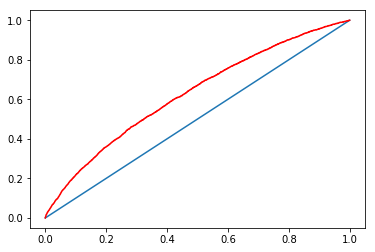

0.253132085912


In [117]:
mlr = MLPClassifier(max_iter=50, hidden_layer_sizes=(20,10,10,10,10,10, 20), verbose=True,activation ='relu', batch_size=1000,tol=0.0001,
                   learning_rate_init=0.0001, solver ='adam', learning_rate='adaptive', early_stopping = False,alpha =0.9)
#mlr.fit(MinMaxScaler(feature_range=(-1,1)).fit_transform(xtr),ytr)
#check_gini(mlr, MinMaxScaler(feature_range=(-1,1)).fit_transform(xvl), yvl)
mlr.fit(StandardScaler().fit_transform(xtr),ytr)
check_gini(mlr, StandardScaler().fit_transform(xvl), yvl)

[LibLinear]

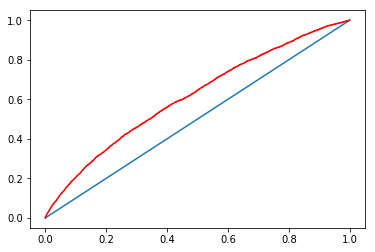

0.227365706879


In [70]:
lr = LogisticRegression(max_iter=200,verbose = 1)
lr.fit(MinMaxScaler(feature_range=(-1,1)).fit_transform(xtr),ytr)
check_gini(lr, MinMaxScaler(feature_range=(-1,1)).fit_transform(xvl), yvl)

In [ ]:
feature = train[['ps_car_13', 'ps_reg_03']]
target = train['target']
mf = mutual_info_classif(train.drop('id',axis=1).values,target.values)
print(mf)

In [ ]:
list(train.drop('id',axis=1).columns.values)

In [ ]:
feat = train.drop('id',axis=1).columns.values
mi = {}
for i in range (len(mf)):
    mi[feat[i]]=mf[i]
print (mi)

In [ ]:
mi_inverse = {}
for i in range (len(mf)):
    mi_inverse[mf[i]]=feat[i]
print (mi_inverse)

In [ ]:
mi_inverse